<a href="https://colab.research.google.com/github/deepintomlf/mlfbook/blob/master/Chapter3_LinearRegression/Lasso%26RidgeRegressionComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


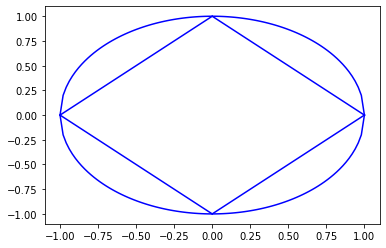

In [ ]:
def plotDiamond(threhold):
  x = np.linspace(0, threhold, 10)
  print(x)
  plt.plot(x, threhold -x, 'b')
  plt.plot(x, x-threhold, 'b')
  
  plt.plot(-x, threhold -x, 'b')
  plt.plot(-x, x-threhold, 'b')

threhold = 1.0
plotDiamond(threhold)

def plotCircle(threhold):
  x = np.linspace(-threhold, threhold, 100)
  plt.plot(x, np.sqrt(threhold**2 -x**2), 'b')
  plt.plot(x, -np.sqrt(threhold**2 -x**2), 'b')

plotCircle(threhold)

[[ 0.5        0.8660254]
 [-0.8660254  0.5      ]]
0.5000000000000001
(1200, 2)
(2, 1)
[[0.29901604 0.24382197]
 [0.24382197 0.30992776]]
[[1.32894802]
 [1.41697253]]
(2, 2)
(2, 1)


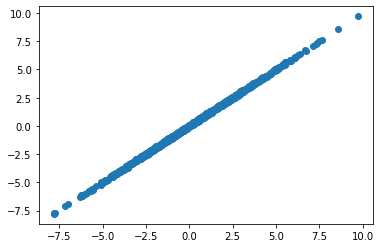

In [ ]:
np.random.seed(42)

# Prepare for the data
# Simulate the data set based on the following model:
# In this example, y = 1.0 x1 + 3*x5+2.7*x10 + e
N = 1200 # N: number of samples
alpha = 2
beta = 3
beta_vec = np.array([alpha,
            beta])
beta_vec = beta_vec.reshape((2,1))
def create_data(N, beta_vec):
  mu, sigma = 0, 0.5 # mean and standard deviation
  d = 2 # d: the input dim
  X = np.random.normal(mu, sigma, [N, d])
  theta = np.pi/3.0

  X = np.matmul(X, np.array([[1, 0.5], [0.5, 1]]))
  print(np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]]))
  print(np.array(np.cos(np.pi/3.0)))
  print(np.shape(X))

  eps = np.random.normal(0, 0.05, [N, 1])
  Y = np.matmul(X, beta_vec) + eps
  Y_true = np.matmul(X, beta_vec)
  plt.scatter(Y, Y_true)
  print(beta_vec.shape)
  return X, Y

X, Y = create_data(N, beta_vec)

xt_x = np.matmul(np.transpose(X), X)/N
xt_y = np.matmul(np.transpose(X), Y)/N
alpha = 3
beta = 2
print(xt_x)
print(xt_y)
print(xt_x.shape)
print(xt_y.shape)

[0.         0.24444444 0.48888889 0.73333333 0.97777778 1.22222222
 1.46666667 1.71111111 1.95555556 2.2       ]
[0.         0.12777778 0.25555556 0.38333333 0.51111111 0.63888889
 0.76666667 0.89444444 1.02222222 1.15      ]
[0.         0.04444444 0.08888889 0.13333333 0.17777778 0.22222222
 0.26666667 0.31111111 0.35555556 0.4       ]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

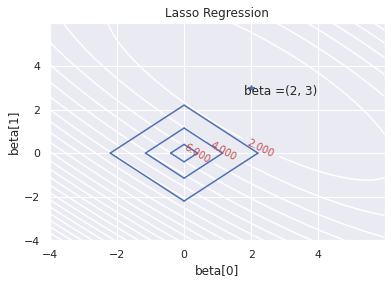

In [ ]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files 

sns.set_theme()

xt_x = np.matmul(np.transpose(X), X)/N
xt_y = np.matmul(np.transpose(X), Y)/N
alpha = 2
beta = 3

delta = 0.025
beta0 = np.arange(-4.0, 6.0, delta)
alpha0 = np.arange(-4.0, 6.0, delta)
Beta, Alpha = np.meshgrid(beta0, alpha0)

Z1 = xt_x[0,0]*(Alpha**2)  + 2*xt_x[0,1]*(Alpha*Beta)+xt_x[1,1]*(Beta**2) - 2*Alpha*xt_y[0,0] - 2*Beta*xt_y[1, 0] + np.matmul(np.transpose(Y), Y)/N
manual_locations = [(2.2
                     , 0), (1.15, 0), (0.4, 0)]
fig, ax = plt.subplots()
CS = ax.contour(Alpha, Beta, Z1, 25, colors="white")
ax.clabel(CS, inline=1, fontsize=10, manual=manual_locations, colors = 'r')

plotDiamond(2.2)
plotDiamond(1.15)
plotDiamond(0.4)
plt.plot( alpha, beta, '*')
plt.xlabel('beta[0]')
plt.ylabel('beta[1]')
plt.text(alpha-0.2, beta-0.3, 'beta ='+ str((alpha, beta)), fontsize=12)
ax.set_title('Lasso Regression')
plt.savefig('Figure3.1a.png', dpi=500)
#files.download('Figure3.1a.png')
#plt.savefig('Figure3.1a.tiff', dpi=500)
#files.download('Figure3.1a.tiff')


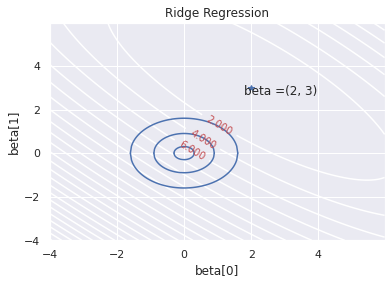

In [ ]:
delta = 0.025
beta0 = np.arange(-4.0, 6.0, delta)
alpha0 = np.arange(-4.0, 6.0, delta)
Beta, Alpha = np.meshgrid(beta0, alpha0)

Z = xt_x[0,0]*(Alpha**2)  + 2*xt_x[0,1]*(Alpha*Beta)+xt_x[1,1]*(Beta**2) - 2*Alpha*xt_y[0,0] - 2*Beta*xt_y[1, 0] + np.matmul(np.transpose(Y), Y)/1200

manual_locations = [(0.3, 0.3), (0.9, 0.9), (0.5, 0.5)]
fig, ax = plt.subplots()
CS = ax.contour(Alpha, Beta, Z,25, colors = 'white')
ax.clabel(CS, inline=1, fontsize=10, manual=manual_locations, colors = 'r')

plotCircle(1.6)
plotCircle(0.9)
plotCircle(0.3)

plt.plot(alpha, beta, '*')
plt.xlabel('beta[0]')
plt.ylabel('beta[1]')
plt.text(alpha-0.2, beta-0.3, 'beta ='+ str((alpha, beta)), fontsize=12)
ax.set_title('Ridge Regression')
plt.savefig('Figure3.1b.png', dpi=500)
#files.download('Figure3.1b.png')
#plt.savefig('Figure3.1b.tiff', dpi=500)
#files.download('Figure3.1b.tiff')
